# **Análisis de las Bromas de Chuck Norris.**

Antes de empezar, importamos el archivo 'results.txt', que contiene la lista de las bromas.

In [2]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

In [4]:
drive.mount('/content/drive')
ruta = '/content/drive/MyDrive/Colab Notebooks/results.txt'
df = pd.read_csv(ruta, delimiter = "\t", header = None, names = ['Jokes'])

Mounted at /content/drive


Una vez tenemos el archivo 'results.txt', visualizamos las 10 primeras lineas para comprobar que se ha exportado correctamente y ya podemos empezar a manipular las frases para el análisis.

In [23]:
df.head(10)

,Jokes
0,"the popular videogame ""DOOM"" is loosely based ..."
1,On 21 december 2012 Chuck Norris will align th...
2,Chuck Norris is like a vampire. The difference...
3,The Original Name of the Movie was Alien vs Ch...
4,Chuck Norris invented Breeding so that he coul...
5,"When E.F. Hutton spoke, people listened. That'..."
6,Chuck Norris wears white after Labor Day.
7,when Chuck Norris lost his ring he made he com...
8,Chuck Norris can stack cups without moving his...
9,Chuck Norris doesn't use a phone to communicat...


El primer paso es separar cada palabra de las frases, eliminar las "stop words" y hacer un recuento de cuántas veces aparecen las palabras restantes.

Las "stop words" o palabras vacías son aquellas que carecen de significado cuando se escriben solas, como las preposiciones o los artículos, entre otras.

In [36]:
all_words = ' '.join(df['Jokes']).split()

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in all_words if word.lower() not in stop_words]

word_counts = Counter(filtered_words)
len(word_counts)

9625

Después de filtrar, vemos que tenemos 9625 palabras diferentes. Así que, el último paso es seleccionar las 30 palabras que más se repiten y construir un diagrama de barras para visualizarlas más fácilmente.

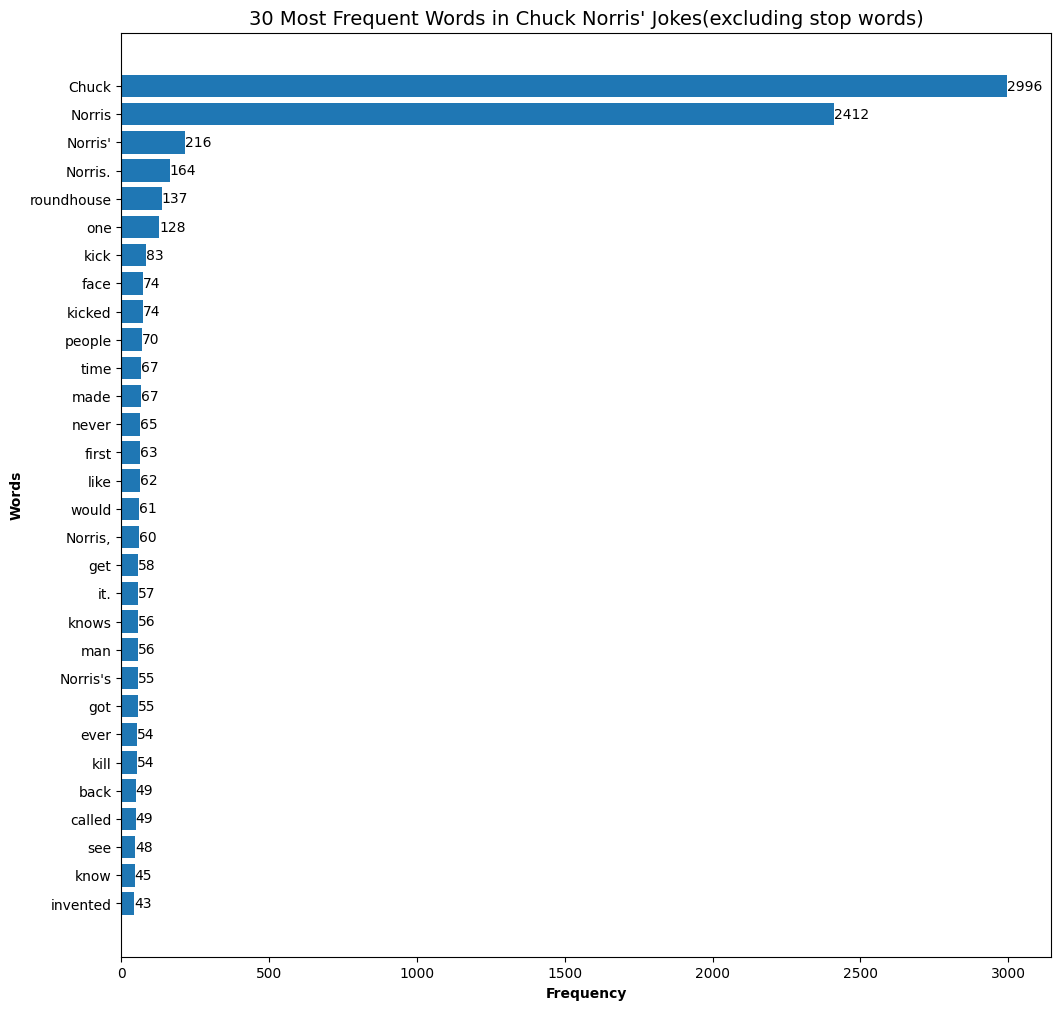

In [38]:
common_words = word_counts.most_common(30)
x, y = zip(*common_words)

plt.figure(figsize=(12, 12))
plt.title("30 Most Frequent Words in Chuck Norris' Jokes(excluding stop words)", fontsize = 14)
plt.xlabel('Frequency', fontsize = 10, fontweight = 'bold')
plt.ylabel('Words', fontsize = 10, fontweight = 'bold')
bars = plt.barh(x,y)
plt.bar_label(bars, fmt='%d', fontsize=10, color='black')
plt.gca().invert_yaxis()
plt.show()
